# CAR VALUATI0N SYSTEM

## BUSINESS UNDERSTANDING

### Project Overview
The Car Valuation System aims to develop a data-driven model that accurately estimates the market value of used cars based on various features such as make, model, age, mileage, fuel type, and more. By leveraging machine learning and data science techniques, the system will provide an automated solution for valuing used cars, which is beneficial for sellers, buyers, dealerships, and financial institutions.

### Business Problem
The primary goal of this project is to develop a robust predictive car valuation model that stakeholders can rely on for accurate pricing, thereby reducing uncertainties and fostering informed decision-making.The used car market is dynamic, with prices influenced by multiple factors including age, condition, location, and demand for specific car models. This variability can lead to challenges for both buyers and sellers:
Buyers: May overpay for a car if they do not have enough information about its true market value.
Sellers: May undervalue their vehicles, leading to loss of potential profit.
Dealerships: Need an efficient way to assess car values for pricing inventory and providing fair trade-in offers.
Financial Institutions: Require accurate car valuations for loan approvals and insurance purposes.

### Project Objectives
Develop a predictive model that takes various car features as input and returns an estimated market price.
Incorporate data from different cities to ensure the model accounts for regional pricing variations.
Evaluate and validate the model using standard regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) score to confirm the accuracy and reliability of the predictions.
Deploy the model in a user-friendly format (e.g., web application) to enable real-time car price estimations.

### Stakeholders
Individual Sellers: People who wish to sell their used cars and need an estimate of their vehicle’s worth.
Car Buyers: Individuals looking to purchase used cars who need to know if the listed price is fair.
Car Dealerships: Businesses that need a reliable tool for pricing trade-ins and inventory to maintain profitability and customer satisfaction.
Financial Institutions and Insurance Companies: Organizations that provide car loans or insurance policies and require accurate car valuations for underwriting and risk assessment.
Online Car Marketplaces: Platforms that list used cars and could use the system to display fair price estimates for users.

## DATA UNDERSTANDING

### Data Overview
We aim to build this System by utilizing a dataset that comprises of car data from various regions and cities in India like Ahmedabad, Bangalore, Chennai, Gurgaon, Hyderabad, Jaipur, Kolkata, Mumbai, and Pune.

### Data Sources and Collection

### Data Description
The dataset contains the following features:

- `Brand`: The manufacturer or brand of the vehicle (e.g., Toyota, Ford).
- `Make_Year`: The year the vehicle was manufactured.
- `Fuel`: The type of fuel the vehicle uses (e.g., Petrol, Diesel, Electric).
- `KMs_Driven`: The total kilometers driven by the vehicle.
- `Engine_Displacement`: The engine capacity measured in liters or cubic centimeters (cc).
- `No_Of_Owner`: The number of previous owners the vehicle has had.
- `Transmission`: Type of transmission (e.g., Manual, Automatic).
- `Mileage`: The distance the vehicle can travel per unit of fuel (usually measured in km/l).
- `Max_Power`: The maximum power output of the engine (measured in horsepower or kilowatts).
- `Torque`: The twisting force produced by the engine (measured in Nm).
- `Seats`: The number of seats in the vehicle.
- `Color`: The color of the vehicle.
- `Gear_Box`: The type of gearbox (could be automatic or manual).
- `Drive_Type`: The drivetrain configuration (e.g., Front-Wheel Drive, Rear-Wheel Drive, All-Wheel Drive).
- `Steering_Type`: The type of steering system (e.g., Power Steering, Manual Steering).
- `Front_Brake_Type`: The type of brakes used on the front wheels (e.g., Disc, Drum).
- `Rear_Brake_Type`: The type of brakes used on the rear wheels (e.g., Disc, Drum).
- `Acceleration`: The time taken to accelerate from 0 to 100 km/h (measured in seconds).
- `Price`: The selling price of the vehicle(The Target Variable).

### Data Exploration

In [427]:
# Import the relevant libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [428]:
# List of city CSV filenames
city_files = [
    'banglore.csv',
    'chennai.csv',
    'gurgaon.csv',
    'hyderabad.csv',
    'jaipur.csv',
    'kolkata.csv',
    'mumbai.csv',
    'pune.csv',
    'ahmedabad.csv'
]
# Initialize an empty list to hold the DataFrames
dataframes = []

# Loop through each file and load it into a DataFrame
for city_file in city_files:
    df = pd.read_csv(city_file)  # Load the CSV file
    df['City'] = city_file.split('.')[0]  # Add a new column for the city
    dataframes.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame
print(combined_df.head(10))  # Display the first ten rows of the combined DataFrame


   Unnamed: 0               Brand  Make_Year    Fuel   KMs_Driven  \
0           0  2017 Hyundai Xcent       2017  Petrol   32,540 Kms   
1           1    2016 Hyundai i20       2015  Petrol   41,061 Kms   
2           2    2019 Honda Amaze       2018  Petrol   40,674 Kms   
3           3   2011 Toyota Etios       2011  Petrol   67,142 Kms   
4           4    2018 Hyundai i20       2018  Petrol   19,274 Kms   
5           5  2016 Ford Ecosport       2016  Petrol   46,012 Kms   
6           6    2012 Hyundai i20       2012  Diesel  100,609 Kms   
7           7    2013 Hyundai EON       2013  Petrol   16,420 Kms   
8           8   2017 Renault KWID       2017  Petrol   25,148 Kms   
9           9  2014 Ford Ecosport       2014  Diesel   62,234 Kms   

  Engine_Displacement No_Of_Owner Transmission     Mileage  Max_Power  ...  \
0             1197 cc   1st Owner       Manual   19.1 kmpl      82bhp  ...   
1             1197 cc   1st Owner       Manual   18.6 kmpl   81.83bhp  ...   
2     

In [429]:
# Check the last 10 rows of the dataset
combined_df.tail(10)

,Unnamed: 0,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,...,Color,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Engine_Type,Price,City
5187,440,Maruti Ertiga SHVS VDI,2017,Diesel,"45,000 kms",1248 CC,First Owner,Manual,24.52 kmpl,88.5 bhp,...,Silver,6 Speed,FWD,Power,Ventilated Disc,Drum,13.3 Seconds,D13A SHVS Engine,6.5 Lakh*,ahmedabad
5188,441,Maruti Wagon R Stingray VXI Optional,2017,Petrol,"46,000 kms",998 CC,First Owner,Manual,20.51 kmpl,67.04 bhp,...,White,6 Speed,FWD,Power,Ventilated Disc,Drum,15 Seconds,K 10B Petrol Engine,4.4 Lakh*,ahmedabad
5189,442,Maruti Ciaz 1.3 Delta,2017,Diesel,"87,000 kms",1248 CC,Second Owner,Manual,28.09 kmpl,88.5 bhp,...,White,7 Speed CVT,FWD,Power,Ventilated Disc,Drum,15 Seconds,DDIS 200 Engine,5.75 Lakh*,ahmedabad
5190,443,Hyundai Verna 1.6 SX CRDi (O),2013,Diesel,"83,000 kms",1582 CC,First Owner,Manual,22.32 kmpl,126.32 bhp,...,Black,5 Speed,FWD,Power,Disc,Disc,10.62 Seconds,Diesel Engine,5.4 Lakh*,ahmedabad
5191,444,Maruti Wagon R Stingray VXI Optional,2017,Petrol,"46,000 kms",998 CC,First Owner,Manual,20.51 kmpl,67.04 bhp,...,White,4 Speed,FWD,Power,Ventilated Disc,Drum,15 Seconds,K 10B Petrol Engine,4.4 Lakh*,ahmedabad
5192,445,Maruti Ciaz 1.3 Delta,2017,Diesel,"87,000 kms",1248 CC,Second Owner,Manual,28.09 kmpl,88.5 bhp,...,White,6 Speed,FWD,Power,Ventilated Disc,Drum,15 Seconds,DDIS 200 Engine,5.75 Lakh*,ahmedabad
5193,446,Hyundai Verna 1.6 SX CRDi (O),2013,Diesel,"83,000 kms",1582 CC,First Owner,Manual,22.32 kmpl,126.32 bhp,...,White,5 Speed,FWD,Power,Disc,Disc,10.62 Seconds,Diesel Engine,5.4 Lakh*,ahmedabad
5194,447,Hyundai Verna 1.6 CRDi AT SX,2015,Diesel,"55,000 kms",1582 CC,First Owner,Automatic,19.08 kmpl,126.2 bhp,...,White,5 Speed,FWD,Power,Disc,Drum,10.62 Seconds,U2 VGT Diesel Engine,6.9 Lakh*,ahmedabad
5195,448,Mahindra XUV500 2011-2015 W8 FWD,2012,Diesel,"76,000 kms",2179 CC,Second Owner,Manual,15.1 kmpl,140 bhp,...,Grey,5 Speed,AWD,Power,Disc & Caliper Type,Disc & Caliper Type,12.5 Seconds,mHawk Diesel Engine,5.25 Lakh*,ahmedabad
5196,449,Renault Duster 110PS Diesel RxZ,2013,Diesel,"52,000 kms",1461 CC,First Owner,Manual,19.01 kmpl,108.45 bhp,...,White,6 Speed,FWD,Power,Ventilated Disc,Drum,-,dCi Diesel Engine,4.9 Lakh*,ahmedabad


In [430]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5197 non-null   int64 
 1   Brand                5197 non-null   object
 2   Make_Year            5197 non-null   int64 
 3   Fuel                 5197 non-null   object
 4   KMs_Driven           5197 non-null   object
 5   Engine_Displacement  5197 non-null   object
 6   No_Of_Owner          5197 non-null   object
 7   Transmission         5197 non-null   object
 8   Mileage              5197 non-null   object
 9   Max_Power            5197 non-null   object
 10  Torque               5197 non-null   object
 11  Seats                5197 non-null   int64 
 12  Color                5197 non-null   object
 13  Gear_Box             5189 non-null   object
 14  Drive_Type           5104 non-null   object
 15  Steering_Type        5172 non-null   object
 16  Front_

In [431]:
# Check the shape of the data
combined_df.shape

(5197, 22)

In [432]:
# Check for the data type
combined_df.dtypes

Unnamed: 0              int64
Brand                  object
Make_Year               int64
Fuel                   object
KMs_Driven             object
Engine_Displacement    object
No_Of_Owner            object
Transmission           object
Mileage                object
Max_Power              object
Torque                 object
Seats                   int64
Color                  object
Gear_Box               object
Drive_Type             object
Steering_Type          object
Front_Brake_Type       object
Rear_Brake_Type        object
Acceleration           object
Engine_Type            object
Price                  object
City                   object
dtype: object

In [433]:
# Summary Statistics
combined_df.describe()

,Unnamed: 0,Make_Year,Seats
count,5197.000000,5197.000000,5197.000000
mean,322.543968,2014.891861,5.188378
std,220.778040,3.094708,0.653730
min,0.000000,1995.000000,2.000000
25%,144.000000,2013.000000,5.000000
50%,294.000000,2015.000000,5.000000
75%,461.000000,2017.000000,5.000000
max,1004.000000,2021.000000,9.000000


## DATA PREPARATION

### Data Cleaning

In [434]:
# Check for duplicates.
combined_df.duplicated()
#df.loc[df.duplicated()]

0       False
1       False
2       False
3       False
4       False
        ...  
5192    False
5193    False
5194    False
5195    False
5196    False
Length: 5197, dtype: bool

#### Data Type Conversion

In [435]:
combined_df.dtypes

Unnamed: 0              int64
Brand                  object
Make_Year               int64
Fuel                   object
KMs_Driven             object
Engine_Displacement    object
No_Of_Owner            object
Transmission           object
Mileage                object
Max_Power              object
Torque                 object
Seats                   int64
Color                  object
Gear_Box               object
Drive_Type             object
Steering_Type          object
Front_Brake_Type       object
Rear_Brake_Type        object
Acceleration           object
Engine_Type            object
Price                  object
City                   object
dtype: object

In [436]:

# Convert relevant columns to string type first
columns_to_clean = ['KMs_Driven', 'Engine_Displacement', 'No_Of_Owner', 
                    'Mileage', 'Max_Power', 'Torque', 'Acceleration', 'Price']

for col in columns_to_clean:
    combined_df[col] = combined_df[col].astype(str)

# Clean and convert to numeric
combined_df['KMs_Driven'] = pd.to_numeric(combined_df['KMs_Driven'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')
combined_df['Engine_Displacement'] = pd.to_numeric(combined_df['Engine_Displacement'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')
combined_df['No_Of_Owner'] = pd.to_numeric(combined_df['No_Of_Owner'].str.replace(r'[^0-9]+', '', regex=True), errors='coerce')
combined_df['Mileage'] = pd.to_numeric(combined_df['Mileage'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')
combined_df['Max_Power'] = pd.to_numeric(combined_df['Max_Power'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')
combined_df['Torque'] = pd.to_numeric(combined_df['Torque'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')
combined_df['Acceleration'] = pd.to_numeric(combined_df['Acceleration'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')
combined_df['Price'] = pd.to_numeric(combined_df['Price'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')

# Convert categorical columns to 'category' dtype
combined_df['Brand'] = combined_df['Brand'].astype('category')
combined_df['Fuel'] = combined_df['Fuel'].astype('category')
combined_df['Transmission'] = combined_df['Transmission'].astype('category')
combined_df['Color'] = combined_df['Color'].astype('category')
combined_df['Gear_Box'] = combined_df['Gear_Box'].astype('category')
combined_df['Drive_Type'] = combined_df['Drive_Type'].astype('category')
combined_df['Steering_Type'] = combined_df['Steering_Type'].astype('category')
combined_df['Front_Brake_Type'] = combined_df['Front_Brake_Type'].astype('category')
combined_df['Rear_Brake_Type'] = combined_df['Rear_Brake_Type'].astype('category')
combined_df['Engine_Type'] = combined_df['Engine_Type'].astype('category')
combined_df['City'] = combined_df['City'].astype('category')

# Check the data types after conversion
print("Data types after conversion:")
print(combined_df.dtypes)


Data types after conversion:
Unnamed: 0                int64
Brand                  category
Make_Year                 int64
Fuel                   category
KMs_Driven                int64
Engine_Displacement     float64
No_Of_Owner             float64
Transmission           category
Mileage                 float64
Max_Power               float64
Torque                  float64
Seats                     int64
Color                  category
Gear_Box               category
Drive_Type             category
Steering_Type          category
Front_Brake_Type       category
Rear_Brake_Type        category
Acceleration            float64
Engine_Type            category
Price                   float64
City                   category
dtype: object


#### Missing Values

In [437]:
# Check for missing values
missing_values = combined_df.isnull().sum()
missing_values

Unnamed: 0                0
Brand                     0
Make_Year                 0
Fuel                      0
KMs_Driven                0
Engine_Displacement       2
No_Of_Owner            3265
Transmission              0
Mileage                  87
Max_Power                41
Torque                    2
Seats                     0
Color                     0
Gear_Box                  8
Drive_Type               93
Steering_Type            25
Front_Brake_Type         24
Rear_Brake_Type          24
Acceleration           1435
Engine_Type              53
Price                     0
City                      0
dtype: int64

In [438]:
# Convert relevant columns to 'category' dtype before handling missing values
categorical_columns = [
    'Fuel', 
    'Transmission', 
    'Color', 
    'Gear_Box', 
    'Drive_Type', 
    'Steering_Type', 
    'Front_Brake_Type', 
    'Rear_Brake_Type', 
    'Engine_Type'
]

# Convert specified columns to category
for col in categorical_columns:
    combined_df[col] = combined_df[col].astype('category')

# Verify the data types
print(combined_df.dtypes)

# Handle missing values for categorical columns
for col in categorical_columns:
    # Add 'Unknown' category if it doesn't exist
    combined_df[col] = combined_df[col].cat.add_categories(['Unknown'])

# Fill missing values with 'Unknown' or mode for specific columns
combined_df['No_Of_Owner'].fillna(combined_df['No_Of_Owner'].mode()[0], inplace=True)  # Fill with mode
combined_df['Gear_Box'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Drive_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Steering_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Front_Brake_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Rear_Brake_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Engine_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'

# Handle missing values for numerical columns with median
combined_df['Engine_Displacement'].fillna(combined_df['Engine_Displacement'].median(), inplace=True)  # Median
combined_df['Mileage'].fillna(combined_df['Mileage'].median(), inplace=True)  # Median
combined_df['Max_Power'].fillna(combined_df['Max_Power'].median(), inplace=True)  # Median
combined_df['Torque'].fillna(combined_df['Torque'].median(), inplace=True)  # Median
combined_df['Acceleration'].fillna(combined_df['Acceleration'].median(), inplace=True)  # Median

# Check for missing values after imputation
missing_values_after = combined_df.isnull().sum()
print("Missing values after further imputation:")
print(missing_values_after[missing_values_after > 0])  # Display only columns with missing values


Unnamed: 0                int64
Brand                  category
Make_Year                 int64
Fuel                   category
KMs_Driven                int64
Engine_Displacement     float64
No_Of_Owner             float64
Transmission           category
Mileage                 float64
Max_Power               float64
Torque                  float64
Seats                     int64
Color                  category
Gear_Box               category
Drive_Type             category
Steering_Type          category
Front_Brake_Type       category
Rear_Brake_Type        category
Acceleration            float64
Engine_Type            category
Price                   float64
City                   category
dtype: object
Missing values after further imputation:
Series([], dtype: int64)


In [439]:
# Handle missing values in categorical columns
combined_df['No_Of_Owner'].fillna(combined_df['No_Of_Owner'].mode()[0], inplace=True)  # Fill with mode
combined_df['Gear_Box'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Drive_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Steering_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Front_Brake_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Rear_Brake_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Engine_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'

# Handle missing values in numerical columns
combined_df['Engine_Displacement'].fillna(combined_df['Engine_Displacement'].median(), inplace=True)  # Median
combined_df['Mileage'].fillna(combined_df['Mileage'].median(), inplace=True)  # Median
combined_df['Max_Power'].fillna(combined_df['Max_Power'].median(), inplace=True)  # Median
combined_df['Torque'].fillna(combined_df['Torque'].median(), inplace=True)  # Median
combined_df['Acceleration'].fillna(combined_df['Acceleration'].median(), inplace=True)  # Median

# Check for missing values again after imputation
missing_values_after = combined_df.isnull().sum()
print("Missing values after further imputation:")
print(missing_values_after[missing_values_after > 0])  # Display only columns with missing values


Missing values after further imputation:
Series([], dtype: int64)


### Data Type Conversion

In [440]:
# Check data types of all columns
#print(combined_df.dtypes)

# Convert 'Price' and other relevant columns to numeric, if necessary
#combined_df['Price'] = pd.to_numeric(combined_df['Price'], errors='coerce')
#combined_df['KMs_Driven'] = pd.to_numeric(combined_df['KMs_Driven'], errors='coerce')
#combined_df['Mileage'] = pd.to_numeric(combined_df['Mileage'].str.replace(' kmpl', ''), errors='coerce')
#combined_df['Max_Power'] = pd.to_numeric(combined_df['Max_Power'].str.replace(' bhp', ''), errors='coerce')


### Feature Engineering

#### One-hot Encoding
Use one-hot encoding for nominal categorical variables to convert them into a format suitable for modeling.

In [441]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = ['Brand', 'Fuel', 'Transmission', 'Color', 'Drive_Type', 'Steering_Type', 'Engine_Type', 'City', 'Gear_Box','Front_Brake_Type','Rear_Brake_Type']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity by dropping one column

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(combined_df[categorical_cols])

# Create a DataFrame from the encoded array
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the original DataFrame with the encoded DataFrame and drop the original categorical columns
combined_df_encoded = pd.concat([combined_df.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Display the first few rows of the new DataFrame
combined_df_encoded.head()

,Unnamed: 0,Make_Year,KMs_Driven,Engine_Displacement,No_Of_Owner,Mileage,Max_Power,Torque,Seats,Acceleration,...,Rear_Brake_Type_Self adjusting drums,Rear_Brake_Type_Self-Adjusting Drum,Rear_Brake_Type_Solid Disc,Rear_Brake_Type_Unknown,Rear_Brake_Type_Vacuum assisted hydraulic dual circuit w,Rear_Brake_Type_Ventialted Disc,Rear_Brake_Type_Ventilated Disc,Rear_Brake_Type_Ventilated Discs,Rear_Brake_Type_Ventilated Drum,Rear_Brake_Type_Ventilated discs
0,0,2017,32540,1197.0,1.0,19.1,82.00,114.00,5,14.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2015,41061,1197.0,1.0,18.6,81.83,114.70,5,13.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018,40674,1198.0,1.0,17.8,86.70,109.00,5,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2011,67142,1496.0,1.0,17.6,15.00,5.00,5,13.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018,19274,1197.0,1.0,21.0,81.86,114.74,5,13.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Feature Scaling
Feature scaling ensures that your features are on a similar scale, which can be important for many machine learning algorithms.
Standardization: Scale features to have a mean of 0 and a standard deviation of 1.
Normalization: Scale features to a range of [0, 1].

In [ ]:
from sklearn.preprocessing import StandardScaler

# Check the columns in combined_df_encoded
#numerical_cols = combined_df_encoded.select_dtypes(include=['number']).columns

#numerical_cols = ['KMs_Driven', 'Engine_Displacement', 'Mileage', 'Max_Power', 'Torque', 'Seats', 'Acceleration']
#print(combined_df_encoded[numerical_cols].isnull().sum())

Unnamed: 0                          0
Make_Year                           0
KMs_Driven                          0
Engine_Displacement                 0
No_Of_Owner                         0
                                   ..
Rear_Brake_Type_Ventialted Disc     0
Rear_Brake_Type_Ventilated Disc     0
Rear_Brake_Type_Ventilated Discs    0
Rear_Brake_Type_Ventilated Drum     0
Rear_Brake_Type_Ventilated discs    0
Length: 2252, dtype: int64


In [443]:
# Initialize the scaler
#scaler = StandardScaler()

# Fit and transform the numerical columns
#combined_df_encoded[numerical_cols] = scaler.fit_transform(combined_df_encoded[numerical_cols])
# Review the scaled data
#print(combined_df_encoded[numerical_cols].head())

In [444]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ['KMs_Driven', 'Engine_Displacement', 'Mileage', 'Max_Power', 'Torque', 'Seats', 'Acceleration']

# Initialize StandardScaler for scaling numerical data
scaler = StandardScaler()

# Scale the numerical columns and store it in a DataFrame with the same column names
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(combined_df_encoded[numerical_cols]), columns=numerical_cols)

# Select all the categorical columns (these are the ones not in numerical_cols)
categorical_cols = [col for col in combined_df_encoded.columns if col not in numerical_cols]
# Extract the one-hot encoded categorical columns
encoded_categorical_df = combined_df_encoded[categorical_cols]

# Combine scaled numerical data and encoded categorical data into one DataFrame
final_df = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)

# Display the first few rows of the final DataFrame
print("Combined DataFrame with scaled numerical and encoded categorical data:")
print(final_df.head())


Combined DataFrame with scaled numerical and encoded categorical data:
   KMs_Driven  Engine_Displacement   Mileage  Max_Power    Torque     Seats  \
0   -0.530154            -0.397338 -0.051647  -0.055285 -0.423364 -0.288186   
1   -0.359916            -0.397338 -0.072989  -0.055288 -0.423364 -0.288186   
2   -0.367648            -0.395150 -0.107136  -0.055193 -0.423364 -0.288186   
3    0.161146             0.256859 -0.115672  -0.056588 -0.423364 -0.288186   
4   -0.795190            -0.397338  0.029451  -0.055288 -0.423364 -0.288186   

   Acceleration  Unnamed: 0  Make_Year  No_Of_Owner  ...  \
0      0.267059           0       2017          1.0  ...   
1     -0.110126           1       2015          1.0  ...   
2      0.568807           2       2018          1.0  ...   
3     -0.072408           3       2011          1.0  ...   
4     -0.072408           4       2018          1.0  ...   

   Rear_Brake_Type_Self adjusting drums  Rear_Brake_Type_Self-Adjusting Drum  \
0            

Outlier Detection
Identify and handle outliers in numerical columns using the IQR (Interquartile Range) method.

In [445]:

# Calculate the IQR for the 'Price' column
Q1 = combined_df['Price'].quantile(0.25)
Q3 = combined_df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = combined_df[(combined_df['Price'] < lower_bound) | (combined_df['Price'] > upper_bound)]
print(f"Number of outliers in 'Price': {outliers.shape[0]}")

# Optionally, visualize outliers with a box plot

#plt.figure(figsize=(10, 6))
#sns.boxplot(data=combined_df, y='Price')
#plt.title('Box Plot for Price')
#plt.show()


Number of outliers in 'Price': 70


### Feature Selection
Feature selection helps in reducing the feature by identifying and selecting the most important features helping improve model performance.
SelectKBest uses statistical tests to select the top K features.

#### Correlation Matrix
Helps you visualize and identify potential multicollinearity between features.

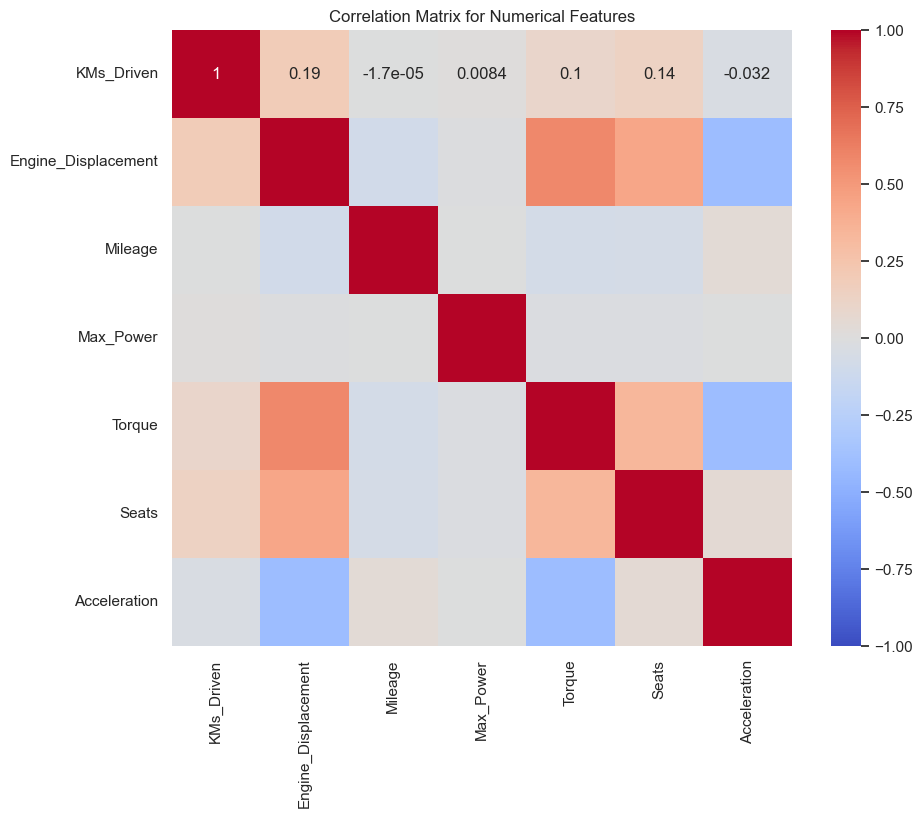

In [446]:

# Create a correlation matrix for numerical features
correlation_matrix = final_df[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


#### Adressing Multicollinearity
Calculate the VIF for each feature and iteratively remove features with a high VIF until all remaining features have acceptable levels of multicollinearity.

In [447]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Get numerical columns in final_df (this should include scaled numeric data)
numerical_cols = final_df.select_dtypes(include=['float64', 'int64']).columns

# Exclude the target variable 'Price' if it's present in the DataFrame
X = final_df[numerical_cols].drop('Price', axis=1, errors='ignore')  # Exclude 'Price' as it's the target variable

# Calculate initial VIF values
vif_df = calculate_vif(X)
print("Initial VIF values:")
print(vif_df)

# Iteratively remove features with VIF > 10
threshold = 10
while vif_df['VIF'].max() > threshold:
    feature_to_drop = vif_df.sort_values('VIF', ascending=False).iloc[0]['Feature']
    print(f"Dropping feature '{feature_to_drop}' with VIF: {vif_df['VIF'].max()}")
    X = X.drop(columns=[feature_to_drop])
    vif_df = calculate_vif(X)

print("Final VIF values:")
print(vif_df)

# Update final_df by removing all features dropped in the loop
features_dropped = [col for col in final_df.columns if col not in X.columns and col != 'Price']
final_df = final_df.drop(columns=features_dropped, errors='ignore')

# Display the resulting DataFrame after dropping highly correlated features
print("Updated DataFrame after VIF removal:")
print(final_df.head())


KeyboardInterrupt: 

In [451]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Copy the DataFrame excluding the target variable ('Price')
# Assuming final_df is your DataFrame
numerical_cols = final_df.select_dtypes(include=['float64', 'int64']).columns  # Get numerical columns

# Exclude 'Price' if it's in the numerical columns
X = final_df[numerical_cols].drop('Price', axis=1, errors='ignore')  # 'Price' is excluded as it's the target variable

# Calculate initial VIF values
vif_df = calculate_vif(X)
print("Initial VIF values:")
print(vif_df)

# Iteratively remove features with VIF > 10
threshold = 10
while vif_df['VIF'].max() > threshold:
    feature_to_drop = vif_df.sort_values('VIF', ascending=False).iloc[0]['Feature']
    print(f"Dropping feature '{feature_to_drop}' with VIF: {vif_df['VIF'].max()}")
    X = X.drop(columns=[feature_to_drop])
    vif_df = calculate_vif(X)

print("Final VIF values:")
print(vif_df)

# Update final_df by removing all features dropped in the loop
features_dropped = [col for col in final_df.columns if col not in X.columns and col != 'Price']
final_df = final_df.drop(columns=features_dropped, errors='ignore')

# Display the resulting DataFrame after dropping highly correlated features
print("Updated DataFrame after VIF removal:")
print(final_df.head())


KeyboardInterrupt: 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Select numerical columns (including scaled ones)
numerical_cols = final_df.select_dtypes(include=['float64', 'int64']).columns

# Drop 'Price' if present as it's the target
X = final_df[numerical_cols].drop('Price', axis=1, errors='ignore')

# Calculate initial VIF values
vif_df = calculate_vif(X)

# Remove features with VIF > 10
threshold = 10
while vif_df['VIF'].max() > threshold:
    feature_to_drop = vif_df.loc[vif_df['VIF'].idxmax(), 'Feature']
    X = X.drop(columns=[feature_to_drop])
    vif_df = calculate_vif(X)

# Update final_df by removing dropped features
final_df = final_df[X.columns]

# Show updated DataFrame
print(final_df.head()) 


In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Copy the DataFrame excluding the target variable ('Price')
#X = combined_df_encoded[numerical_cols].drop('Price', axis=1, errors='ignore')  # 'Price' is excluded as it's the target variable
X = final_df[numerical_cols].drop('Price', axis=1, errors='ignore')
# Calculate initial VIF values
vif_df = calculate_vif(X)
print("Initial VIF values:")
print(vif_df)

# Iteratively remove features with VIF > 10
threshold = 10
while vif_df['VIF'].max() > threshold:
    feature_to_drop = vif_df.sort_values('VIF', ascending=False).iloc[0]['Feature']
    print(f"Dropping feature '{feature_to_drop}' with VIF: {vif_df['VIF'].max()}")
    X = X.drop(columns=[feature_to_drop])
    vif_df = calculate_vif(X)

print("Final VIF values:")
print(vif_df)

# Update combined_df_encoded by removing all features dropped in the loop
#features_dropped = [col for col in combined_df_encoded.columns if col not in X.columns and col != 'Price']
#combined_df_encoded = combined_df_encoded.drop(columns=features_dropped, errors='ignore')

features_dropped = [col for col in final_df.columns if col not in X.columns and col != 'Price']
final_df = final_df.drop(columns=features_dropped, errors='ignore')


c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define X and y
X = combined_df_encoded.drop('Price', axis=1)  # Drop the target variable
y = combined_df_encoded['Price']

# Initialize SelectKBest with f_regression as the score function and select all features
selector = SelectKBest(score_func=f_regression, k='all')

# Fit the selector to the data
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Create a new DataFrame with selected features (and optionally add Price if needed)
combined_selected_df = combined_df_encoded[selected_features]
combined_selected_df = combined_selected_df.assign(Price=y)

# Print the selected features
print(selected_features)


Index(['KMs_Driven', 'Engine_Displacement', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Acceleration'],
      dtype='object')


In [ ]:
combined_selected_df.head(10)

,KMs_Driven,Engine_Displacement,Mileage,Max_Power,Torque,Seats,Acceleration,Price
0,-0.530154,-0.397338,-0.051647,-0.055285,-0.423364,-0.288186,0.267059,597000.0
1,-0.359916,-0.397338,-0.072989,-0.055288,-0.423364,-0.288186,-0.110126,570000.0
2,-0.367648,-0.395150,-0.107136,-0.055193,-0.423364,-0.288186,0.568807,600000.0
3,0.161146,0.256859,-0.115672,-0.056588,-0.423364,-0.288186,-0.072408,349500.0
4,-0.795190,-0.397338,0.029451,-0.055288,-0.423364,-0.288186,-0.072408,780000.0
5,-0.261002,0.259047,-0.141282,-0.054519,-0.423364,-0.288186,-0.072408,554000.0
6,0.829770,0.038064,0.040975,-0.055153,-0.423364,-0.288186,-0.072408,415000.0
7,-0.852209,-1.235323,0.033719,-0.055806,-0.423364,-0.288186,2.077549,270000.0
8,-0.677835,-0.830552,0.115244,-0.055577,-0.423364,-0.288186,-0.072408,375000.0
9,0.063091,0.261235,0.059329,-0.054950,-0.423364,-0.288186,-0.072408,600000.0


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

X = combined_df_encoded.drop('Price', axis=1)  # Drop the target variable
y = combined_df_encoded['Price']

selector = SelectKBest(score_func=f_regression, k=all)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Create a new DataFrame with selected features
combined_selected_df = combined_df_encoded[selected_features]
combined_selected_df = combined_selected_df.assign(Price=y)


print(selected_features)


InvalidParameterError: The 'k' parameter of SelectKBest must be a str among {'all'} or an int in the range [0, inf). Got <built-in function all> instead.

ValueError: k should be <= n_features = 7; got 50. Use k='all' to return all features.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Ensure all columns in X are numeric
X = combined_df_encoded.drop('Price', axis=1)

# Check data types to identify any non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns

if len(non_numeric_cols) > 0:
    print("Non-numeric columns detected:", non_numeric_cols)
    # Convert non-numeric columns to numeric (e.g., using one-hot encoding)
    X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# Proceed with feature selection
y = combined_df_encoded['Price']

# Initialize SelectKBest with f_regression and select top 50 features
selector = SelectKBest(score_func=f_regression, k=all)

# Fit the selector to the data
X_new = selector.fit_transform(X, y)

# Get selected feature names using the original X columns (before transformation)
selected_features = X.columns[selector.get_support()]

# Create a new DataFrame with selected features and re-add the target variable
combined_selected_df = X[selected_features].copy()  # Get the selected features
combined_selected_df['Price'] = y  # Add the target variable back to the DataFrame

# Print the selected features
print("Selected Features:")
print(selected_features)


InvalidParameterError: The 'k' parameter of SelectKBest must be a str among {'all'} or an int in the range [0, inf). Got <built-in function all> instead.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Drop the target variable (Price)
X = combined_df_encoded.drop('Price', axis=1)

# Proceed with feature selection
y = combined_df_encoded['Price']

# Set SelectKBest with f_regression and select all features
selector = SelectKBest(score_func=f_regression, k='all')  # Select all features
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]

# Create a new DataFrame with selected features and re-add the target variable
combined_selected_df = X[selected_features]  # Use the selected features from X
combined_selected_df = combined_selected_df.assign(Price=y)  # Add the target variable back

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['KMs_Driven', 'Engine_Displacement', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Acceleration'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define features and target
X = combined_df_encoded.drop('Price', axis=1)
y = combined_df_encoded['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and RFECV
model = LinearRegression()
selector = RFECV(estimator=model, step=1, cv=5)

# Fit RFECV to data
selector.fit(X_train, y_train)

# Get the selected features
selected_features_rfecv = X.columns[selector.support_]

print("Selected Features using RFECV:")
print(selected_features_rfecv)


Selected Features using RFECV:
Index(['KMs_Driven', 'Engine_Displacement', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Acceleration'],
      dtype='object')
